# PREPROCESSING

In [ ]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#baca dataset train
train = pd.read_csv('train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0000,0,0,111369,30.0000,C148,C


In [ ]:
#baca dataset test
test = pd.read_csv('test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
#melihat info dari dataset train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Terlihat ada data missing pada kolom age, cabin, dan embarked

In [ ]:
#melihat jumlah data null tiap kolom
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- terdapat 12 kolom, dan yang paling banyak missing valuesnya adalah kolom kabin
- pada kolom age dan embarked juga ada beberapa missing value

In [ ]:
#mengelompokan kolom berdasarkan jenis categorik dan numerik
cat = ["Name","Sex","Ticket","Cabin","Embarked"]
num = ["PassengerId","Survived","Pclass","Age","SibSp","Parch","Fare"]

In [ ]:
#melihat info jenis kolom categorik
train[cat].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


- para penumpang kapal mayoritas berjenis kelamin laki-laki
- ticket kemungkinan mengalami duplikat karena ada ticket dengan kuantitas 7
- lebih baik menghapus kolom Cabin Karena terlalu banyak missing value menjadikan data kurang spesifik
- para penumpang kapal mayoritas berangkat pada pelabuhan S

In [ ]:
#melihat info jenis kolom numerik
train[num].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0000,891.0000,891.0000,714.0000,891.0000,891.0000,891.0000
mean,446.0000,0.3838,2.3086,29.6991,0.5230,0.3816,32.2042
std,257.3538,0.4866,0.8361,14.5265,1.1027,0.8061,49.6934
min,1.0000,0.0000,1.0000,0.4200,0.0000,0.0000,0.0000
25%,223.5000,0.0000,2.0000,20.1250,0.0000,0.0000,7.9104
50%,446.0000,0.0000,3.0000,28.0000,0.0000,0.0000,14.4542
75%,668.5000,1.0000,3.0000,38.0000,1.0000,0.0000,31.0000
max,891.0000,1.0000,3.0000,80.0000,8.0000,6.0000,512.3292


- para penumpang kapal mayoritas tidak selamat
- para penumpang kapal membeli tiket rata-rata pada kelas 2 (middle) sampai 3 (low)
- para penumpang kapal rata-rata berusia 29 tahun yang artinya mayoritas penumpang kapal adalah dewasa
- para penumpang kapal rata-rata berstatus berpasangan dan mereka tidak memiliki anak / orang tua ketika berada dikapal
- rata rata tarif penumpang kapal adalah $32/ penumpang
- variable yang kemungkinan skew adalah fare, tetapi kita perlu cek nilai skew agar mendapatkan nilai yang cocok dalam mengisi nilai yang hilang

In [ ]:
#melihat jumlah tiap valuenya
for col in cat: 
    print(f'''Value count kolom {col}:''')
    print(train[col].value_counts())
    print()

Value count kolom Name:
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

Value count kolom Sex:
male      577
female    314
Name: Sex, dtype: int64

Value count kolom Ticket:
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

Value count kolom Cabin:
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34    

# EDA

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 10
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

**UNIVARIATE ANALISIS**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

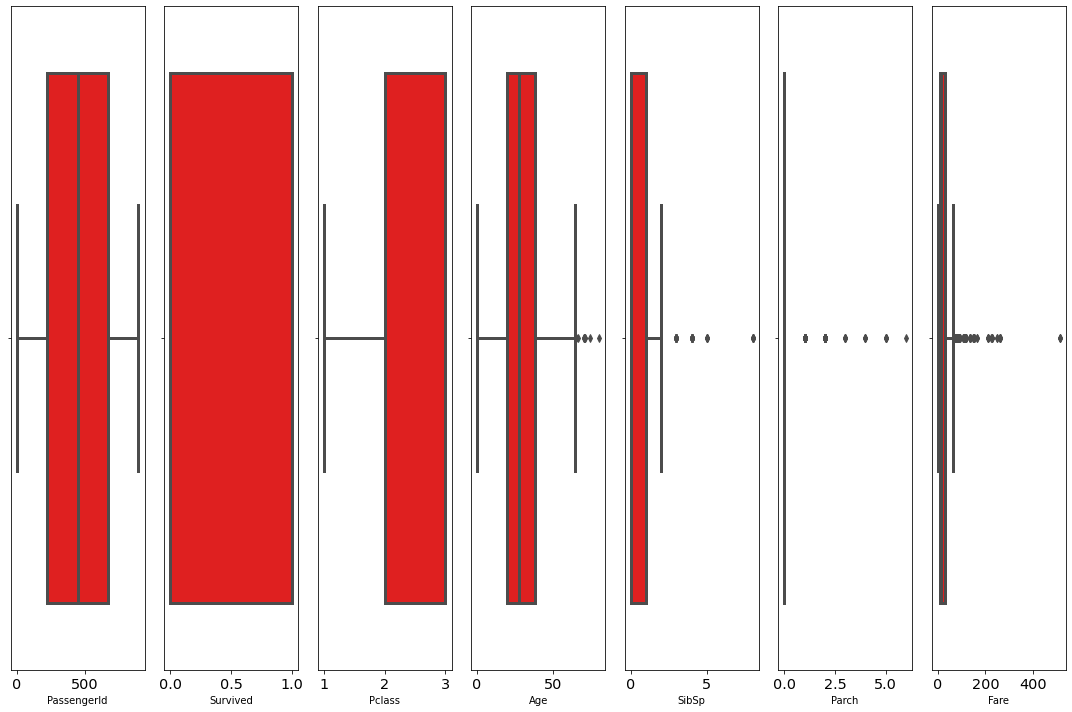

In [ ]:
#Box Plot
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(train[num[i]], color='red', orient='h')
    plt.tight_layout()

- pada kolom Pclass terlihat skew negatif
- pada kolom age, sibsp, fare terlihat skew positif 
- pada kolom age, sibsp, pearch, fare terlihat bahwa ada outlier sehingga perlu dihapus

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Ver

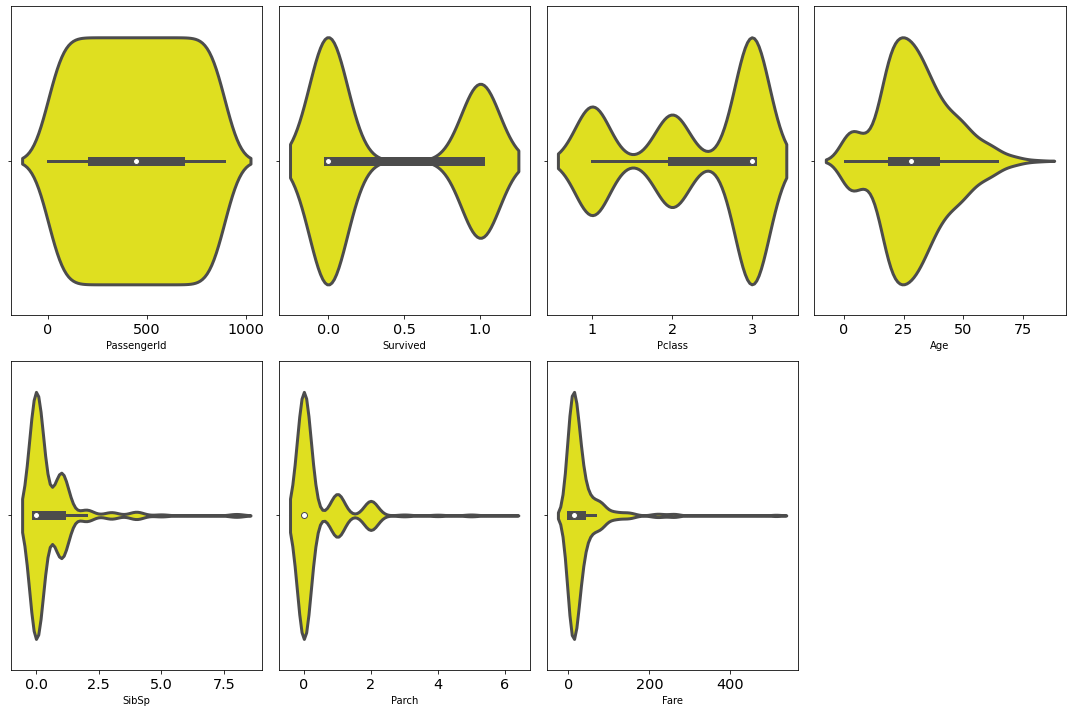

In [ ]:
#violin plot
for i in range(0, len(num)):
    plt.subplot(2,4, i+1)
    sns.violinplot(train[num[i]], color='yellow', orient='v')
    plt.tight_layout()

- pada kolom survived terlihat bahwa mayoritas tidak selamat (0)
- pada kolom pclass terlihat mayoritas penumpang berada dikelas low (3)
- pada kolom age terlihat mayoritas distribusi umur berada pada angka 20-40th (skew positif)
- mayoritas penumpang lajang sampai berpasangan (0 s/d 1)
- pada kolom parch mayoritas terlihat tidak memilki anak atau orang tua yang berada dikapal
- range biaya antara $0-20/ penumpang

In [ ]:
#menghapus kolom yang banyak terdapat nilai unik
train.drop(['Name', 'PassengerId','Cabin'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


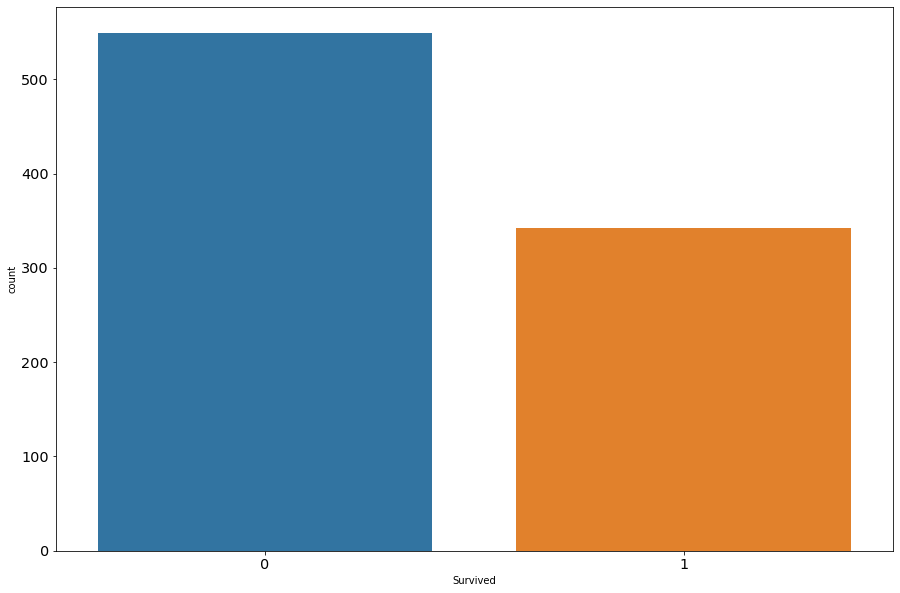

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


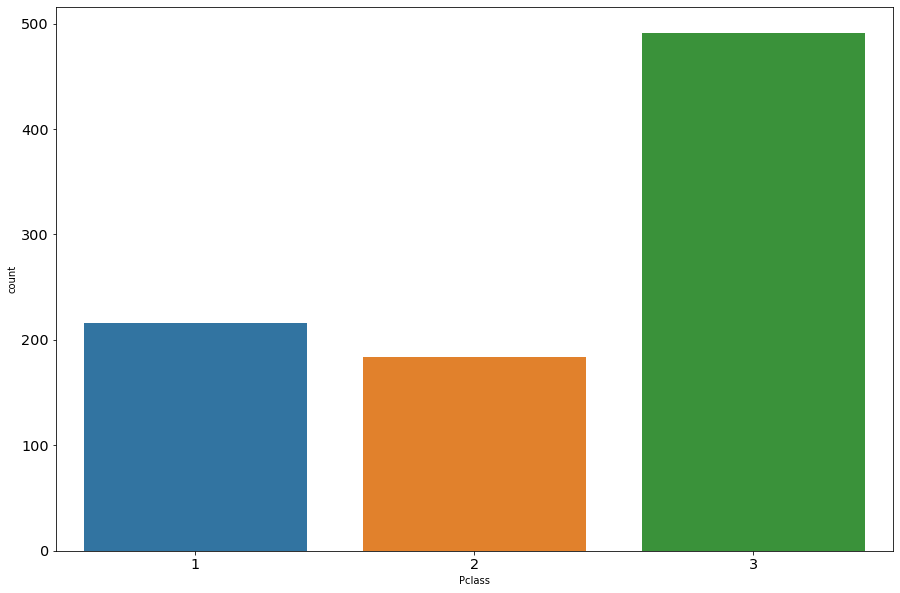

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


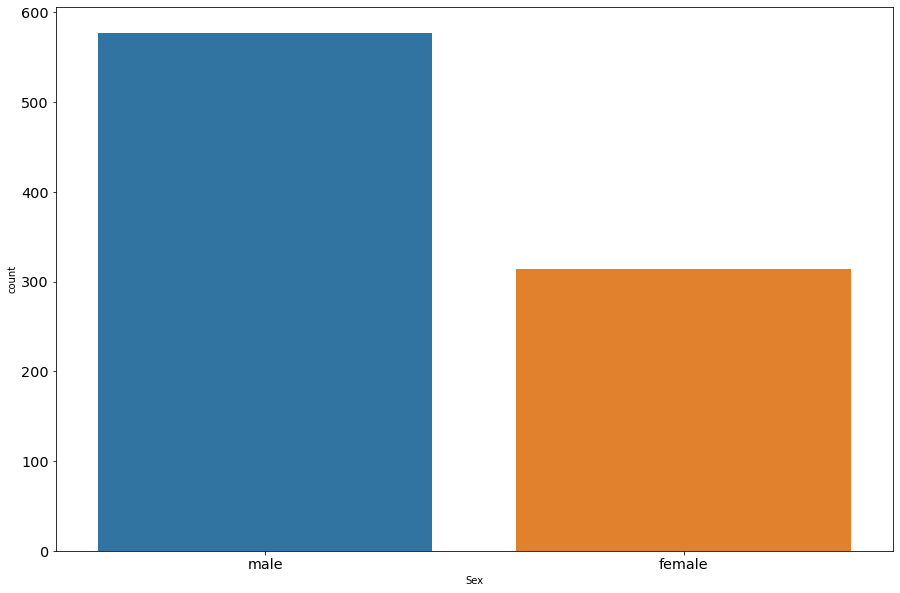

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


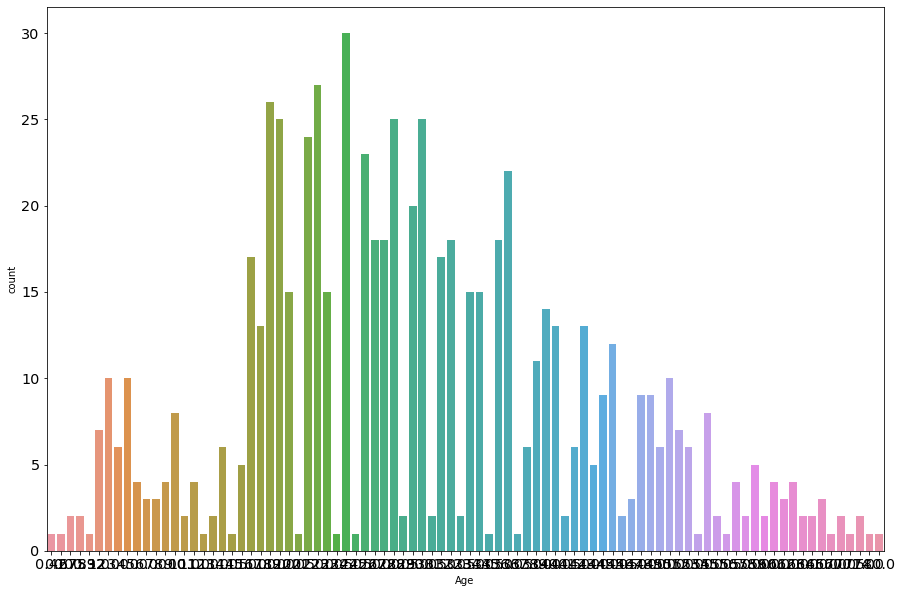

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


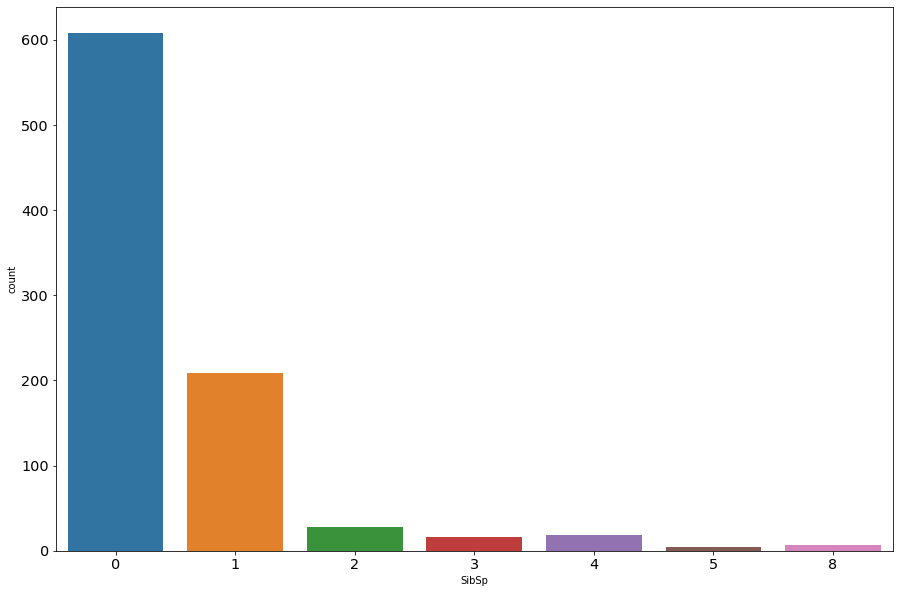

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


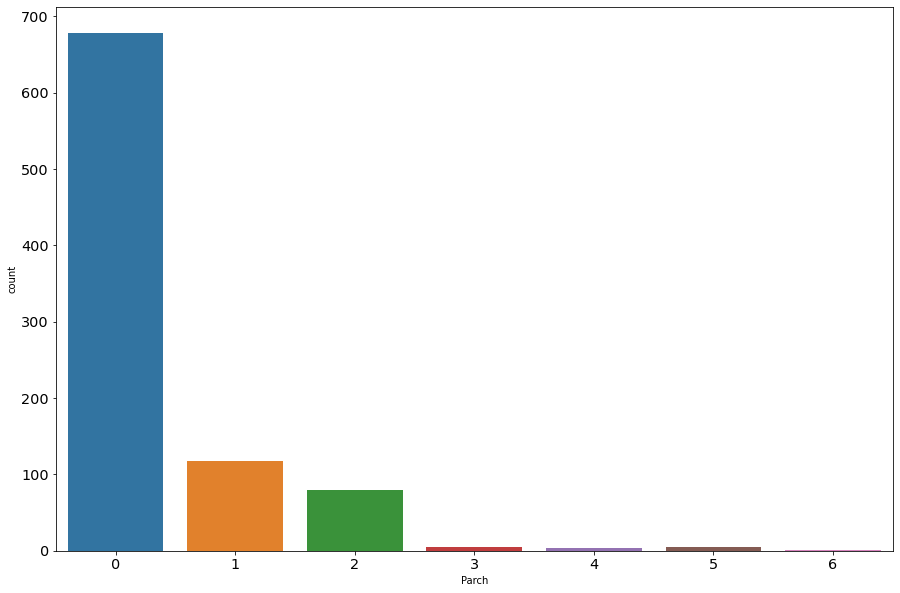

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


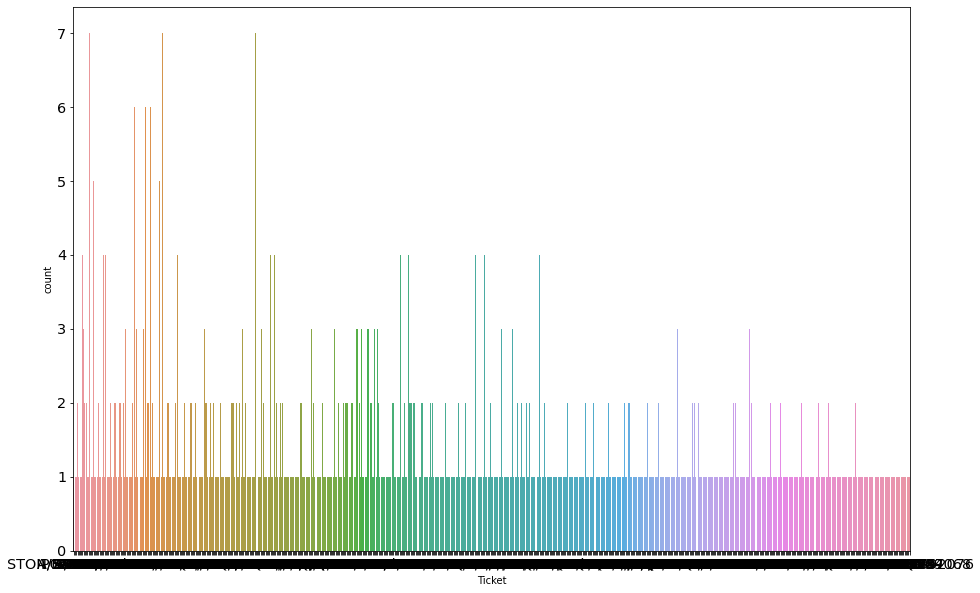

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


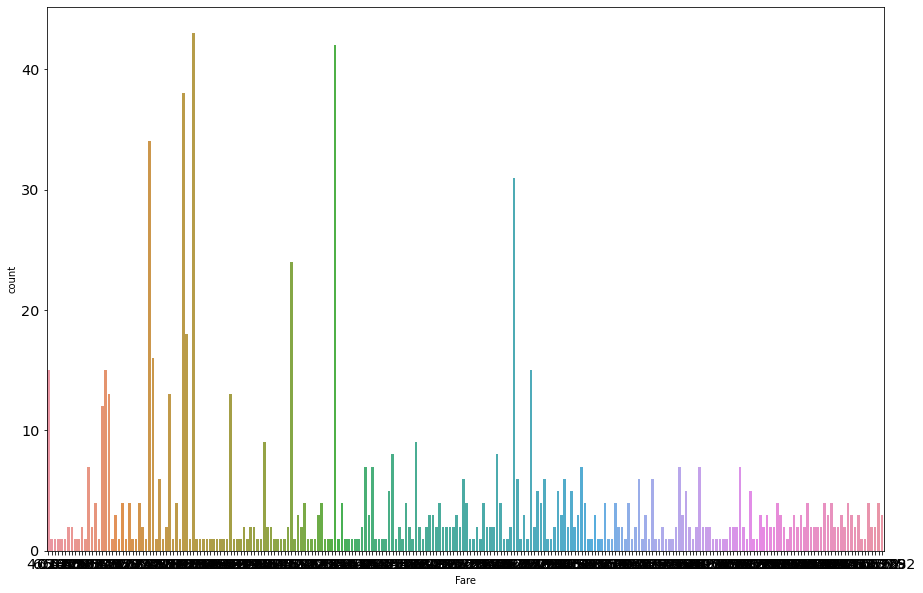

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


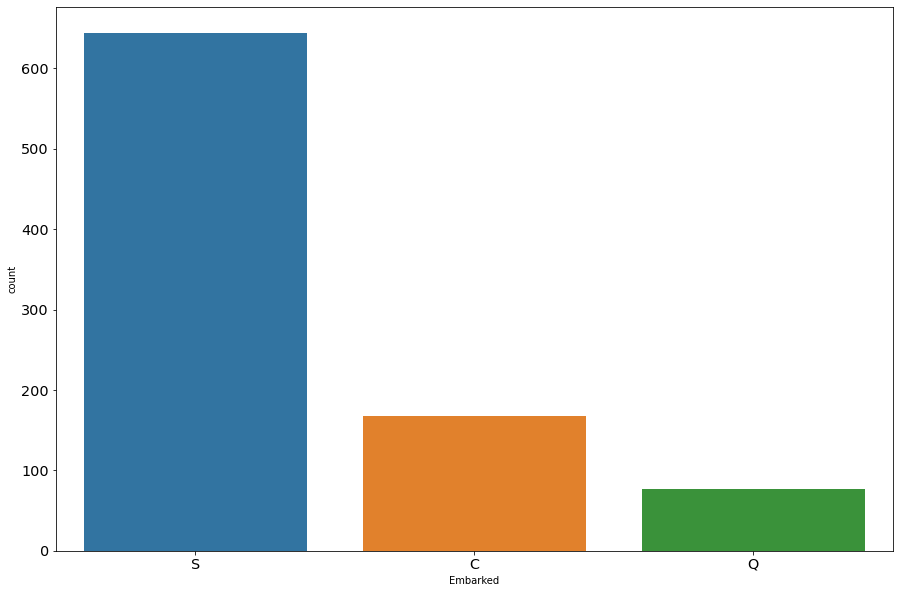

In [ ]:
#visualisasi univariate
for i in train.columns:
    sns.countplot(train[i])
    plt.show()

- jumlah penumpang tidak selamat lebih banyak dibanding jumlah yang selamat
- mayoritas penumpang dari kelas 3  dikapal titanic
- jumlah penumpang berjenis kelamin pria lebih banyak dibanding jenis kelamin perempuan
- mayoritas penumpang lajang dibuktikan dengan kolom sibsp dan parch dengan angka 0
- mayoritas penumpang berangkat dari pelabuhan S

In [ ]:
#cek missing value
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [ ]:
#handle missing value
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
train['Age'].fillna(train['Age'].mean(), inplace=True)

In [ ]:
#cek missing value setelah dihandle
train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [ ]:
#cek data duplikat
print(train.duplicated().sum())

15


In [ ]:
#handle data duplikat
train.drop_duplicates(inplace=True)

In [ ]:
#cek data duplikat setelah dihandle
print(train.duplicated().sum())

0


In [ ]:
#filter outlier
print(f'Jumlah baris sebelum memfilter outlier: {len(train)}')

filtered_entries = np.array([False] * len(train))
for col in ['Age','Fare']:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((train[col] < low_limit) | (train[col] > high_limit)) | filtered_entries
    
train1 = train[~filtered_entries]
print(f'Jumlah baris setelah memfilter outlier: {len(train1)}')

Jumlah baris sebelum memfilter outlier: 876
Jumlah baris setelah memfilter outlier: 711


In [ ]:
#melihat skew pada masing" kolom/variabel
pd.set_option("display.float", "{:.4f}".format)
train1.skew().to_frame().rename(columns={0:'Skewness'}).sort_values('Skewness')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


,Skewness
Pclass,-1.1072
Age,0.0163
Survived,0.7086
Fare,1.5126
SibSp,2.9364
Parch,3.3665


- dapat dilihat bahwa yang memiliki skew cukup besar adalah parch, sibsp, fare, dan pclass sehingga perlu dilakukan normalization

In [ ]:
#normalisasi (handle skew)
from sklearn.preprocessing import MinMaxScaler, StandardScaler

train1['Pclass_norm'] = MinMaxScaler().fit_transform(train1['Pclass'].values.reshape(len(train1), 1))
train1['Fare_norm'] = MinMaxScaler().fit_transform(train1['Fare'].values.reshape(len(train1), 1))
train1['SibSp_norm'] = MinMaxScaler().fit_transform(train1['SibSp'].values.reshape(len(train1), 1))
train1['Parch_norm'] = MinMaxScaler().fit_transform(train1['Parch'].values.reshape(len(train1), 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [ ]:
#cek dataset yang sudah diperbaruhi
train1

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Pclass_norm,Fare_norm,SibSp_norm,Parch_norm
0,0,3,male,22.0000,1,0,A/5 21171,7.2500,S,1.0000,0.1144,0.2000,0.0000
2,1,3,female,26.0000,0,0,STON/O2. 3101282,7.9250,S,1.0000,0.1251,0.0000,0.0000
3,1,1,female,35.0000,1,0,113803,53.1000,S,0.0000,0.8381,0.2000,0.0000
4,0,3,male,35.0000,0,0,373450,8.0500,S,1.0000,0.1271,0.0000,0.0000
5,0,3,male,29.6991,0,0,330877,8.4583,Q,1.0000,0.1335,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0000,0,0,211536,13.0000,S,0.5000,0.2052,0.0000,0.0000
887,1,1,female,19.0000,0,0,112053,30.0000,S,0.0000,0.4735,0.0000,0.0000
888,0,3,female,29.6991,1,2,W./C. 6607,23.4500,S,1.0000,0.3701,0.2000,0.3333
889,1,1,male,26.0000,0,0,111369,30.0000,C,0.0000,0.4735,0.0000,0.0000


In [ ]:
#menghapus kolom yang belum dinormalisasikan
train1.drop(['Pclass','SibSp','Parch','Fare'], axis=1, inplace=True)
train1

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Survived,Sex,Age,Ticket,Embarked,Pclass_norm,Fare_norm,SibSp_norm,Parch_norm
0,0,male,22.0000,A/5 21171,S,1.0000,0.1144,0.2000,0.0000
2,1,female,26.0000,STON/O2. 3101282,S,1.0000,0.1251,0.0000,0.0000
3,1,female,35.0000,113803,S,0.0000,0.8381,0.2000,0.0000
4,0,male,35.0000,373450,S,1.0000,0.1271,0.0000,0.0000
5,0,male,29.6991,330877,Q,1.0000,0.1335,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...
886,0,male,27.0000,211536,S,0.5000,0.2052,0.0000,0.0000
887,1,female,19.0000,112053,S,0.0000,0.4735,0.0000,0.0000
888,0,female,29.6991,W./C. 6607,S,1.0000,0.3701,0.2000,0.3333
889,1,male,26.0000,111369,C,0.0000,0.4735,0.0000,0.0000


**BIVARIATE ANALYSIS**

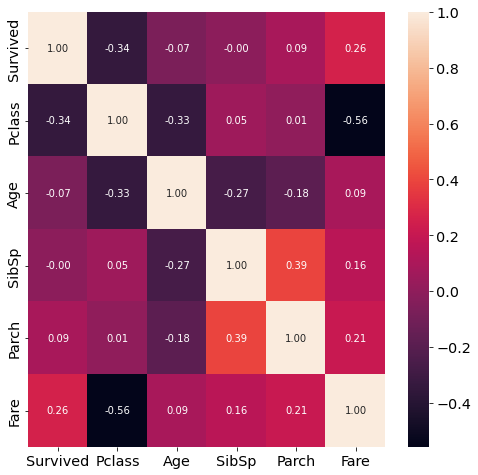

In [ ]:
#Heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(train.corr(), annot=True, fmt='.2f')

<Figure size 1080x1080 with 0 Axes>

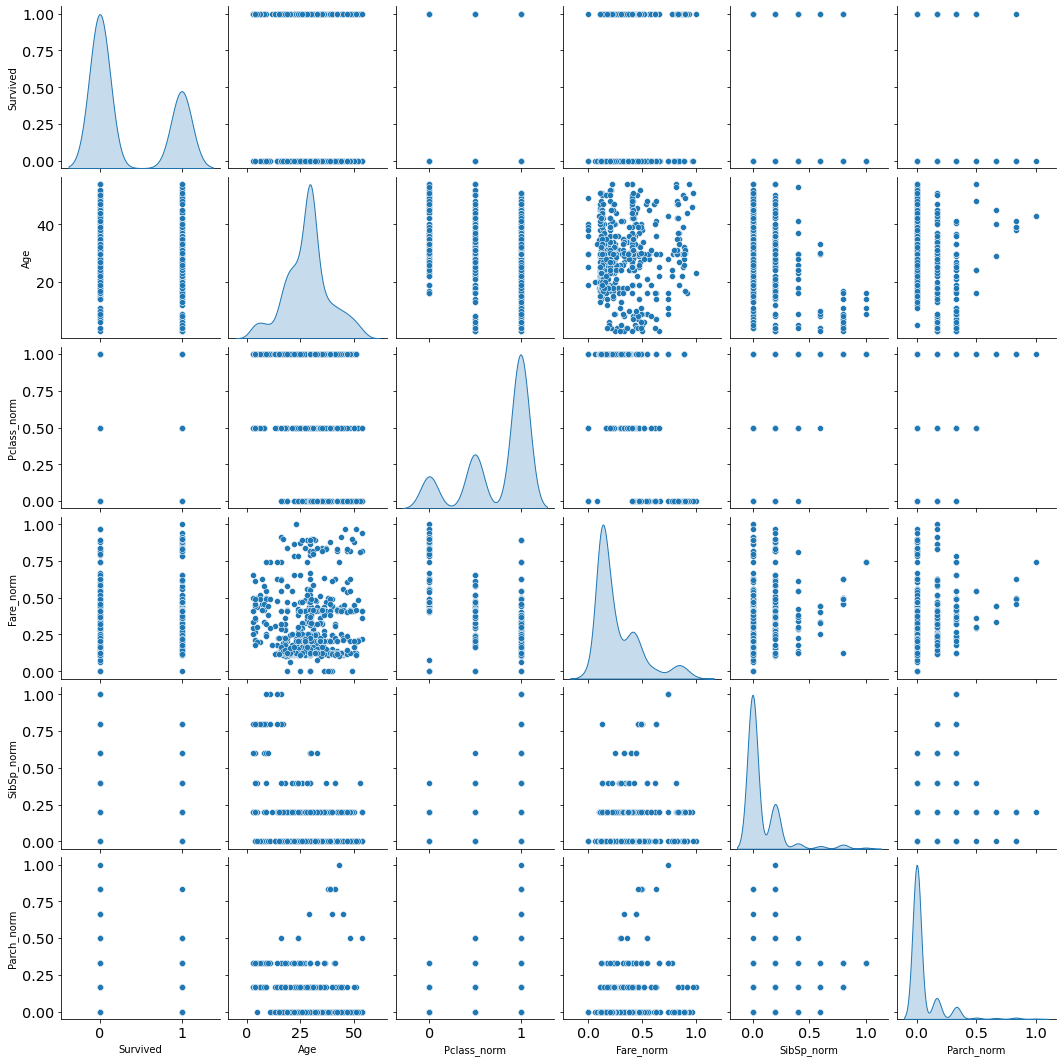

In [ ]:
#Pair Plot
plt.figure(figsize=(15, 15))
sns.pairplot(train1, diag_kind='kde') 

In [ ]:
#menghapus kolom tiket karena banyak terdapat nilai unik
del train1['Ticket']

In [ ]:
train2 = pd.get_dummies(train1)
train2.head()

,Survived,Age,Pclass_norm,Fare_norm,SibSp_norm,Parch_norm,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0000,1.0000,0.1144,0.2000,0.0000,0,1,0,0,1
2,1,26.0000,1.0000,0.1251,0.0000,0.0000,1,0,0,0,1
3,1,35.0000,0.0000,0.8381,0.2000,0.0000,1,0,0,0,1
4,0,35.0000,1.0000,0.1271,0.0000,0.0000,0,1,0,0,1
5,0,29.6991,1.0000,0.1335,0.0000,0.0000,0,1,0,1,0


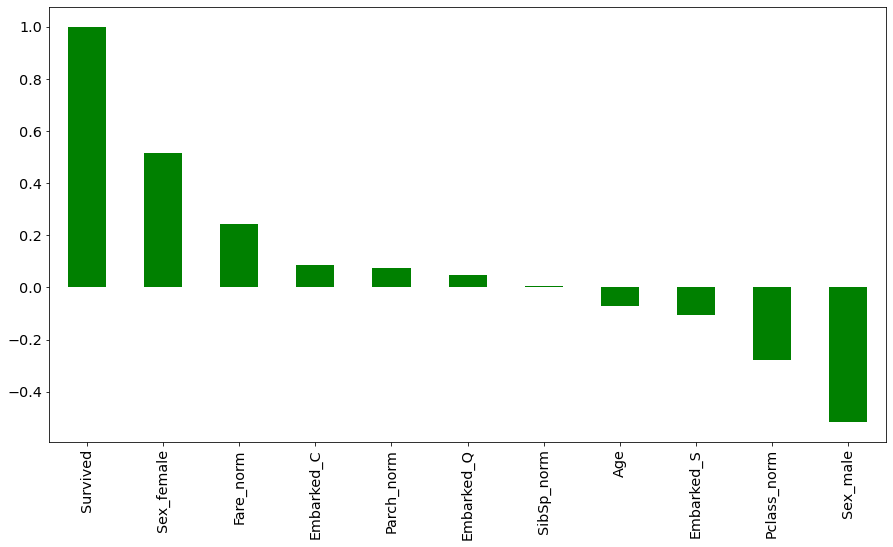

In [ ]:
#cek korelasi antar kolom
plt.figure(figsize=(15,8))
train2.corr()['Survived'].sort_values(ascending = False).plot(kind='bar', color='green')

Text(0.5, 1.0, 'Proporsi Survived (%)')

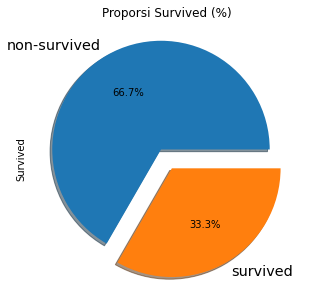

In [ ]:
#Pie Plot
labels = 'non-survived','survived'
train2['Survived'].value_counts().plot.pie(explode=[0.1,0.1],labels=labels, autopct='%1.1f%%',shadow=True,figsize=(5,5));
plt.title("Proporsi Survived (%)")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

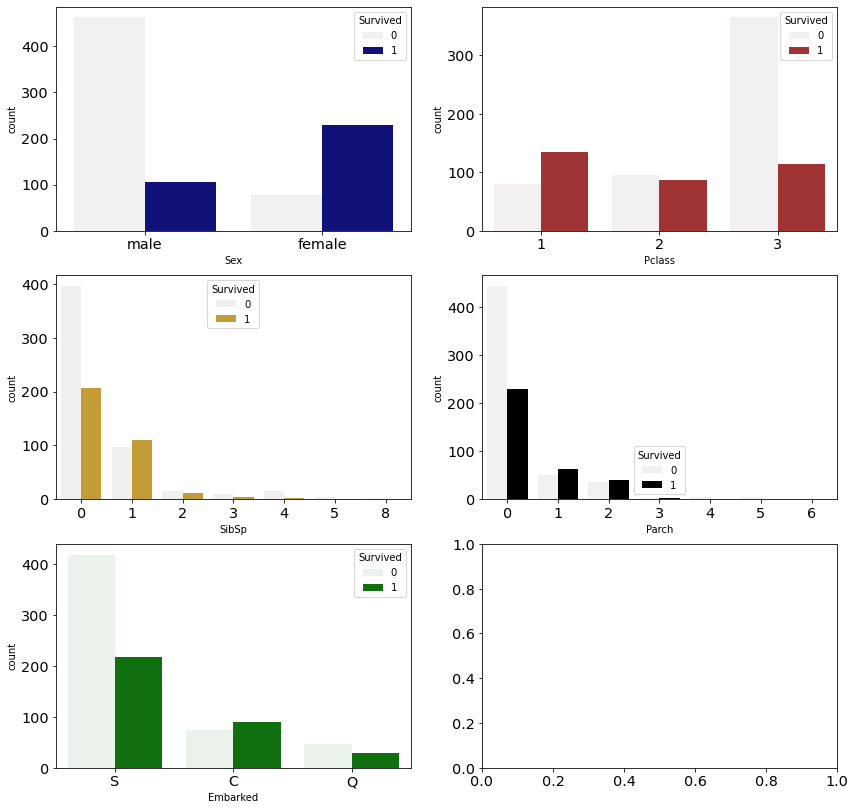

In [ ]:
#Count Plot
fig, ax =plt.subplots(nrows=3,ncols=2,figsize=(14,14))
sns.countplot('Sex',hue='Survived',data=train,color='darkblue',ax=ax[0,0])
sns.countplot('Pclass',hue='Survived',data=train,color='firebrick',ax=ax[0,1])
sns.countplot('SibSp',hue='Survived',data=train,color='goldenrod',ax=ax[1,0])
sns.countplot('Parch',hue='Survived',data=train,color='black',ax=ax[1,1])
sns.countplot('Embarked',hue='Survived',data=train,color='green',ax=ax[2,0])
plt.show()

- para penumpang kapal yang selamat mayoritas berjenis kelamin perempuan
- para penumpang kapal yang selamat mayoritas berada dikelas 1 (high class)
- para penumpang kapal yang memiliki 1 pasangan atau 1 saudara kandung dan 1 anak kandung / orang tua banyak yang selamat
- para penumpang kapal yang selamat dibandingkan yang tidak selamat pada setiap pelabuhan mayoritas dari pelabuhan C
- namun para penumpang kapal yang selamat paling banyak dari pelabuhan S

In [ ]:
#mengkategorikan kolom umur
train2['kategori_umur'] = pd.cut(train2['Age'].astype(int), bins=[-1,11,18,22,27,33,40,66,100], labels=[1,2,3,4,5,6,7,8]).to_frame()
    
#mengkategorikan kolom jumlah keluarga
train2['jumlah_keluarga'] = train2['Parch_norm']+ train2['SibSp_norm']+ 1 
train2['jumlah_keluarga'] = train2['jumlah_keluarga'].astype(int)
    
#mengkategorikan kolom class umur
train2['age_class'] = train2['kategori_umur'] * train2['Pclass_norm']
train2['age_class'] = train2['age_class'].astype(int) 
    
#mengkategorikan kolom biaya per orang
train2['biaya_per_orang'] = train2['Fare_norm']/(train2['jumlah_keluarga'])
train2['biaya_per_orang'] = train2['biaya_per_orang'].astype(float)  
    
#mengkategorikan kolom jumlah keluarga
train2['is_alone'] = 0
train2.loc[train2['jumlah_keluarga'] == 1, 'is_alone'] = 1
    
#mengubah kolom pclass, sibsp and parch columns menjadi data int
train2[['Pclass_norm','SibSp_norm','Parch_norm']] = train2[['Pclass_norm','SibSp_norm','Parch_norm']].astype(int)

In [ ]:
train2.head()

,Survived,Age,Pclass_norm,Fare_norm,SibSp_norm,Parch_norm,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,kategori_umur,jumlah_keluarga,age_class,biaya_per_orang,is_alone
0,0,22.0000,1,0.1144,0,0,0,1,0,0,1,3,1,3,0.1144,1
2,1,26.0000,1,0.1251,0,0,1,0,0,0,1,4,1,4,0.1251,1
3,1,35.0000,0,0.8381,0,0,1,0,0,0,1,6,1,0,0.8381,1
4,0,35.0000,1,0.1271,0,0,0,1,0,0,1,6,1,6,0.1271,1
5,0,29.6991,1,0.1335,0,0,0,1,0,1,0,5,1,5,0.1335,1


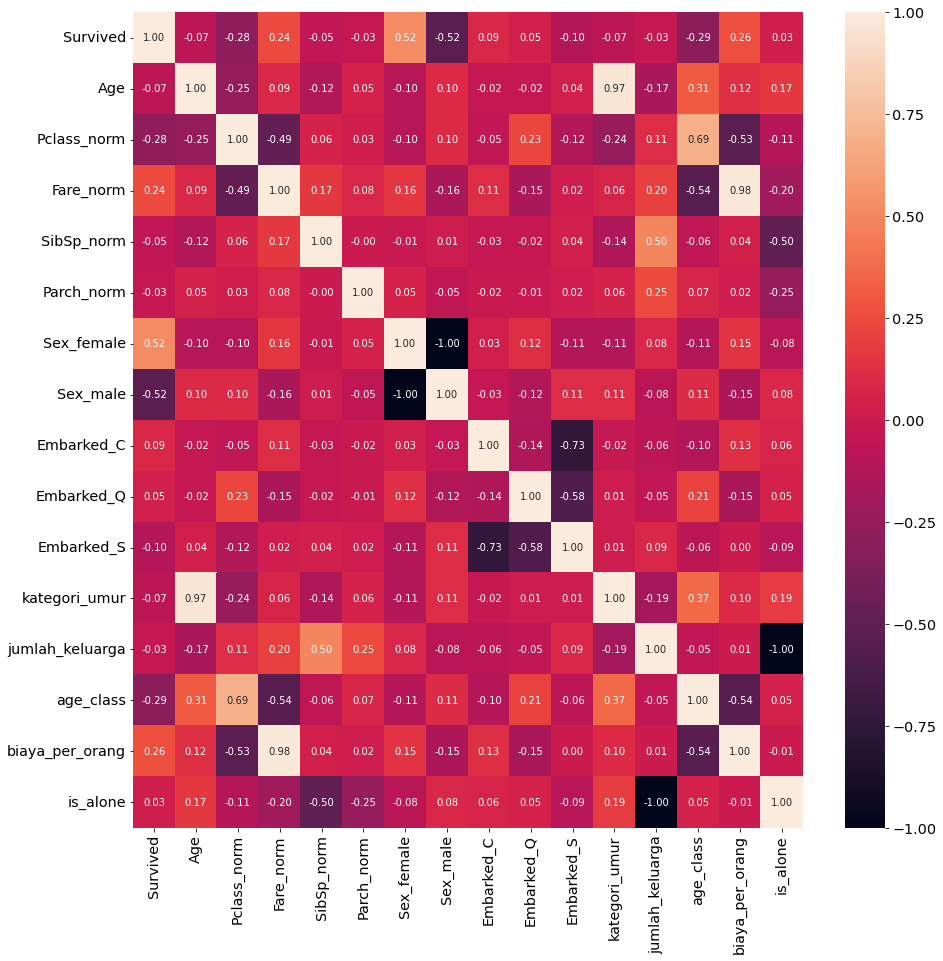

In [ ]:
#Head Map Train2
plt.figure(figsize=(15, 15))
sns.heatmap(train2.corr(), annot=True, fmt='.2f')

In [ ]:
#drop kolom yang kurang penting
train2.drop(['Age','Fare_norm'], axis=1, inplace=True)

In [ ]:
train2

,Survived,Pclass_norm,SibSp_norm,Parch_norm,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,kategori_umur,jumlah_keluarga,age_class,biaya_per_orang,is_alone
0,0,1,0,0,0,1,0,0,1,3,1,3,0.1144,1
2,1,1,0,0,1,0,0,0,1,4,1,4,0.1251,1
3,1,0,0,0,1,0,0,0,1,6,1,0,0.8381,1
4,0,1,0,0,0,1,0,0,1,6,1,6,0.1271,1
5,0,1,0,0,0,1,0,1,0,5,1,5,0.1335,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,1,0,0,1,4,1,2,0.2052,1
887,1,0,0,0,1,0,0,0,1,3,1,0,0.4735,1
888,0,1,0,0,1,0,0,0,1,5,1,5,0.3701,1
889,1,0,0,0,0,1,1,0,0,4,1,0,0.4735,1


# MODELLING

In [ ]:
#mengubah terlebih dahulu karena datanya imbalance
train2['Survived_class'] = train2['Survived'] > 0.8
train2['Survived_class'].value_counts()

False    474
True     237
Name: Survived_class, dtype: int64

In [ ]:
X = train2[[col for col in train2.columns if (str(train2[col].dtype) != 'object') and col not in ['Survived', 'Survived_class']]]
y = train2['Survived_class'].values
print(X.shape)
print(y.shape)

(711, 13)
(711,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=95)

In [ ]:
#import library
from sklearn.svm import SVC #MODEL SVM
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
#MODEL Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)
from sklearn import metrics
prediction_test = model.predict(X_test)

print (metrics.accuracy_score(y_test, prediction_test)) 

0.8111888111888111


In [ ]:
#MODEL Random Forest
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=2000 , oob_score = True, n_jobs = -1, random_state =75, max_features = "auto", max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8321678321678322


In [ ]:
#MODEL SVM
from sklearn.svm import SVC 
model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)

preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8041958041958042

In [ ]:
#MODEL AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train,y_train)

preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8111888111888111

In [ ]:
#MODEL XGB Classifier
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8531468531468531

Dapat dilihat bahwa akurasi tertinggi menggunakan model machine learning "XGB Classifier"

# Deploy ke Data Test

**PREPROCESSING DATA TEST**

In [ ]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
#menghapus kolom yang banyak terdapat nilai unik
test.drop(['Name', 'PassengerId','Cabin'], axis=1, inplace=True)

In [ ]:
#cek missing value
test.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
Embarked     0
dtype: int64

In [ ]:
#handle missing value
test['Fare'].fillna(test['Fare'].mode()[0], inplace=True)
test['Age'].fillna(test['Age'].mean(), inplace=True)

In [ ]:
#cek missing value setelah dihandle
test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [ ]:
#cek data duplikat
print(test.duplicated().sum())

1


In [ ]:
#handle data duplikat
test.drop_duplicates(inplace=True)

In [ ]:
#cek data duplikat setelah dihandle
print(test.duplicated().sum())

0


In [ ]:
#normalisasi
from sklearn.preprocessing import MinMaxScaler, StandardScaler

test['Pclass_norm'] = MinMaxScaler().fit_transform(test['Pclass'].values.reshape(len(test), 1))
test['Fare_norm'] = MinMaxScaler().fit_transform(test['Fare'].values.reshape(len(test), 1))
test['SibSp_norm'] = MinMaxScaler().fit_transform(test['SibSp'].values.reshape(len(test), 1))
test['Parch_norm'] = MinMaxScaler().fit_transform(test['Parch'].values.reshape(len(test), 1))

In [ ]:
#menghapus kolom tiket karena banyak terdapat nilai unik
del test['Ticket']

In [ ]:
test1 = pd.get_dummies(test)
test1.head()

,Pclass,Age,SibSp,Parch,Fare,Pclass_norm,Fare_norm,SibSp_norm,Parch_norm,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5000,0,0,7.8292,1.0000,0.0153,0.0000,0.0000,0,1,0,1,0
1,3,47.0000,1,0,7.0000,1.0000,0.0137,0.1250,0.0000,1,0,0,0,1
2,2,62.0000,0,0,9.6875,0.5000,0.0189,0.0000,0.0000,0,1,0,1,0
3,3,27.0000,0,0,8.6625,1.0000,0.0169,0.0000,0.0000,0,1,0,0,1
4,3,22.0000,1,1,12.2875,1.0000,0.0240,0.1250,0.1111,1,0,0,0,1


In [ ]:
#mengkategorikan kolom umur
test1['kategori_umur'] = pd.cut(test1['Age'].astype(int), bins=[-1,11,18,22,27,33,40,66,100], labels=[1,2,3,4,5,6,7,8]).to_frame()
    
#mengkategorikan kolom jumlah keluarga
test1['jumlah_keluarga'] = test1['Parch_norm']+ test1['SibSp_norm']+ 1 
test1['jumlah_keluarga'] = test1['jumlah_keluarga'].astype(int)
    
#mengkategorikan kolom class umur
test1['age_class'] = test1['kategori_umur'] * test1['Pclass_norm']
test1['age_class'] = test1['age_class'].astype(int) 
    
#mengkategorikan kolom biaya per orang
test1['biaya_per_orang'] = test1['Fare_norm']/(test1['jumlah_keluarga'])
test1['biaya_per_orang'] = test1['biaya_per_orang'].astype(float)  
    
#mengkategorikan kolom jumlah keluarga
test1['is_alone'] = 0
test1.loc[test1['jumlah_keluarga'] == 1, 'is_alone'] = 1
    
#mengubah kolom pclass, sibsp and parch columns menjadi data int
test1[['Pclass_norm','SibSp_norm','Parch_norm']] = test1[['Pclass_norm','SibSp_norm','Parch_norm']].astype(int)

In [ ]:
#drop kolom yang kurang penting
test1.drop(['Age','Fare_norm'], axis=1, inplace=True)

In [ ]:
test1.head()

,Pclass,SibSp,Parch,Fare,Pclass_norm,SibSp_norm,Parch_norm,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,kategori_umur,jumlah_keluarga,age_class,biaya_per_orang,is_alone
0,3,0,0,7.8292,1,0,0,0,1,0,1,0,6,1,6,0.0153,1
1,3,1,0,7.0000,1,0,0,1,0,0,0,1,7,1,7,0.0137,1
2,2,0,0,9.6875,0,0,0,0,1,0,1,0,7,1,3,0.0189,1
3,3,0,0,8.6625,1,0,0,0,1,0,0,1,4,1,4,0.0169,1
4,3,1,1,12.2875,1,0,0,1,0,0,0,1,3,1,3,0.0240,1


In [ ]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_norm,Fare_norm,SibSp_norm,Parch_norm
0,3,male,34.5000,0,0,7.8292,Q,1.0000,0.0153,0.0000,0.0000
1,3,female,47.0000,1,0,7.0000,S,1.0000,0.0137,0.1250,0.0000
2,2,male,62.0000,0,0,9.6875,Q,0.5000,0.0189,0.0000,0.0000
3,3,male,27.0000,0,0,8.6625,S,1.0000,0.0169,0.0000,0.0000
4,3,female,22.0000,1,1,12.2875,S,1.0000,0.0240,0.1250,0.1111
...,...,...,...,...,...,...,...,...,...,...,...
413,3,male,30.2726,0,0,8.0500,S,1.0000,0.0157,0.0000,0.0000
414,1,female,39.0000,0,0,108.9000,C,0.0000,0.2126,0.0000,0.0000
415,3,male,38.5000,0,0,7.2500,S,1.0000,0.0142,0.0000,0.0000
416,3,male,30.2726,0,0,8.0500,S,1.0000,0.0157,0.0000,0.0000


In [ ]:
test1

,Pclass,SibSp,Parch,Fare,Pclass_norm,SibSp_norm,Parch_norm,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,kategori_umur,jumlah_keluarga,age_class,biaya_per_orang,is_alone
0,3,0,0,7.8292,1,0,0,0,1,0,1,0,6,1,6,0.0153,1
1,3,1,0,7.0000,1,0,0,1,0,0,0,1,7,1,7,0.0137,1
2,2,0,0,9.6875,0,0,0,0,1,0,1,0,7,1,3,0.0189,1
3,3,0,0,8.6625,1,0,0,0,1,0,0,1,4,1,4,0.0169,1
4,3,1,1,12.2875,1,0,0,1,0,0,0,1,3,1,3,0.0240,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,0,8.0500,1,0,0,0,1,0,0,1,5,1,5,0.0157,1
414,1,0,0,108.9000,0,0,0,1,0,1,0,0,6,1,0,0.2126,1
415,3,0,0,7.2500,1,0,0,0,1,0,0,1,6,1,6,0.0142,1
416,3,0,0,8.0500,1,0,0,0,1,0,0,1,5,1,5,0.0157,1


**DEPLOY MODEL KE DATA TEST**

In [ ]:
frames = [train2, test1]

hasil = pd.concat(frames)

hasil

,Survived,Pclass_norm,SibSp_norm,Parch_norm,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,kategori_umur,jumlah_keluarga,age_class,biaya_per_orang,is_alone,Survived_class,Pclass,SibSp,Parch,Fare
0,0.0000,1,0,0,0,1,0,0,1,3,1,3,0.1144,1,False,NaN,NaN,NaN,NaN
2,1.0000,1,0,0,1,0,0,0,1,4,1,4,0.1251,1,True,NaN,NaN,NaN,NaN
3,1.0000,0,0,0,1,0,0,0,1,6,1,0,0.8381,1,True,NaN,NaN,NaN,NaN
4,0.0000,1,0,0,0,1,0,0,1,6,1,6,0.1271,1,False,NaN,NaN,NaN,NaN
5,0.0000,1,0,0,0,1,0,1,0,5,1,5,0.1335,1,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,1,0,0,0,1,0,0,1,5,1,5,0.0157,1,NaN,3.0000,0.0000,0.0000,8.0500
414,NaN,0,0,0,1,0,1,0,0,6,1,0,0.2126,1,NaN,1.0000,0.0000,0.0000,108.9000
415,NaN,1,0,0,0,1,0,0,1,6,1,6,0.0142,1,NaN,3.0000,0.0000,0.0000,7.2500
416,NaN,1,0,0,0,1,0,0,1,5,1,5,0.0157,1,NaN,3.0000,0.0000,0.0000,8.0500


In [ ]:
del hasil['Survived_class']

In [ ]:
del hasil['Pclass']

In [ ]:
del hasil['SibSp']

In [ ]:
del hasil['Parch']

In [ ]:
del hasil['Fare']

In [ ]:
hasil

,Survived,Pclass_norm,SibSp_norm,Parch_norm,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,kategori_umur,jumlah_keluarga,age_class,biaya_per_orang,is_alone
0,0.0000,1,0,0,0,1,0,0,1,3,1,3,0.1144,1
2,1.0000,1,0,0,1,0,0,0,1,4,1,4,0.1251,1
3,1.0000,0,0,0,1,0,0,0,1,6,1,0,0.8381,1
4,0.0000,1,0,0,0,1,0,0,1,6,1,6,0.1271,1
5,0.0000,1,0,0,0,1,0,1,0,5,1,5,0.1335,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,1,0,0,0,1,0,0,1,5,1,5,0.0157,1
414,NaN,0,0,0,1,0,1,0,0,6,1,0,0.2126,1
415,NaN,1,0,0,0,1,0,0,1,6,1,6,0.0142,1
416,NaN,1,0,0,0,1,0,0,1,5,1,5,0.0157,1


In [ ]:
#mengubah terlebih dahulu karena datanya imbalance
hasil['Survived_class'] = hasil['Survived'] > 0.7
hasil['Survived_class'].value_counts()

False    891
True     237
Name: Survived_class, dtype: int64

In [ ]:
X = hasil[[col for col in hasil.columns if (str(hasil[col].dtype) != 'object') and col not in ['Survived', 'Survived_class']]]
y = hasil['Survived_class'].values
print(X.shape)
print(y.shape)

(1128, 13)
(1128,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.37, random_state=95)

In [ ]:
#import library
from sklearn.svm import SVC #MODEL SVM
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
#MODEL Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)
from sklearn import metrics
prediction_test = model.predict(X_test)

print (metrics.accuracy_score(y_test, prediction_test)) 

0.8349282296650717


In [ ]:
#MODEL Random Forest
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=2000 , oob_score = True, n_jobs = -1, random_state =75, max_features = "auto", max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8636363636363636


In [ ]:
#MODEL SVM
from sklearn.svm import SVC 
model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)

preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8421052631578947

In [ ]:
#MODEL AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train,y_train)

preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.861244019138756

In [ ]:
#MODEL XGB Classifier
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8755980861244019

Terlihat bahwa model yang akurasinya paling besar yaitu model "XGB Classifier"
Sama seperti model yang digunakan terhadap data train